In [115]:
#Dataset and Data Preprocessing 

In [116]:
import pandas as pd 

In [117]:
data = pd.read_excel(r"C:\Users\golli\Downloads\sebokeng_data spreadsheet.xlsx")

In [118]:
print(data)

          sebSO2      sebNO2       sebO3     sebPM25     sebPM10
0            NaN         NaN         NaN         NaN         NaN
1            NaN         NaN         NaN         NaN         NaN
2            NaN         NaN         NaN         NaN         NaN
3            NaN         NaN         NaN         NaN         NaN
4            NaN         NaN         NaN         NaN         NaN
5            NaN         NaN         NaN         NaN         NaN
6            NaN         NaN         NaN         NaN         NaN
7            NaN         NaN         NaN         NaN         NaN
8            NaN         NaN         NaN         NaN         NaN
9            NaN         NaN         NaN         NaN         NaN
10           NaN         NaN   53.279000         NaN         NaN
11     12.757653   20.591640   49.440750   71.006958         NaN
12     15.414879   25.047945   55.257417   56.674708   52.925478
13      4.040258   18.503978   46.795583  102.502417   92.675087
14           NaN         

In [119]:
#cleaning the dataset 

In [120]:
data_cleaned=data.dropna(how="all")

In [121]:
print(data_cleaned),data_cleaned.info()


          sebSO2      sebNO2       sebO3     sebPM25     sebPM10
10           NaN         NaN   53.279000         NaN         NaN
11     12.757653   20.591640   49.440750   71.006958         NaN
12     15.414879   25.047945   55.257417   56.674708   52.925478
13      4.040258   18.503978   46.795583  102.502417   92.675087
14           NaN         NaN   38.219000         NaN         NaN
30           NaN         NaN   38.982167         NaN         NaN
31      7.036883   16.658053   42.713750  288.647042         NaN
32     11.003236   15.049400   54.047000  171.121167         NaN
33     34.562713    9.707807   25.895000   32.844833         NaN
34     15.918683   27.192555   40.990870   36.200125         NaN
35      3.873670   24.340125   39.352917   30.224292         NaN
36      3.724548   15.723772   30.437833   22.820000         NaN
37      3.835243   19.651013   39.938250   26.749792         NaN
38      3.789175   18.448362   59.356500  181.563875         NaN
39      3.797690   22.827

(None, None)

In [122]:
 #Description Of data 

In [123]:
import numpy as np 

In [124]:
mean = data_cleaned.mean()

In [125]:
median = data_cleaned.median()

In [126]:
percentile_25 = data_cleaned.quantile(0.25)

In [127]:
percentile_75 = data_cleaned.quantile(0.75)

In [128]:
min_val = data_cleaned.min()

In [129]:
max_val = data_cleaned.max()


In [149]:
Descrp_starts = pd.DataFrame(
    {'Mean': mean,
     'Median': median,
     '25th Percentile':percentile_25,
     '75th Percentile': percentile_75,
     'Min': min_val,
     'Max': max_val}
)

In [150]:
print(Descrp_starts)

              Mean     Median  25th Percentile  75th Percentile       Min  \
sebSO2   13.877048  10.360277         6.187676        17.229557  0.190387   
sebNO2   25.350595  23.416105        18.360628        30.367969  0.000000   
sebO3    55.590021  53.699667        37.442500        71.014333  0.000000   
sebPM25  31.673353  27.742417        19.661917        38.294458  3.634714   
sebPM10  46.370742  41.075083        30.136500        56.197313  2.460333   

                Max  
sebSO2   115.727693  
sebNO2   115.438737  
sebO3    199.584250  
sebPM25  288.647042  
sebPM10  194.949870  


In [131]:
data_cleaned.describe()

,sebSO2,sebNO2,sebO3,sebPM25,sebPM10
count,1925.000000,2055.000000,2371.000000,1853.000000,1827.000000
mean,13.877048,25.350595,55.590021,31.673353,46.370742
std,11.669311,10.510577,24.103645,18.867618,24.009341
min,0.190387,0.000000,0.000000,3.634714,2.460333
25%,6.187676,18.360628,37.442500,19.661917,30.136500
50%,10.360277,23.416105,53.699667,27.742417,41.075083
75%,17.229557,30.367969,71.014333,38.294458,56.197313
max,115.727693,115.438737,199.584250,288.647042,194.949870


In [132]:
#percentage of missing data

In [133]:
missing_data= data_cleaned.isnull().sum()

In [134]:
total_data=len(data_cleaned)

In [135]:
percentage_missing=(missing_data/total_data)*100

In [136]:
print(percentage_missing)

sebSO2     20.091324
sebNO2     14.694894
sebO3       1.577418
sebPM25    23.080116
sebPM10    24.159402
dtype: float64


In [137]:
#Visualisation Time Series

In [138]:
import matplotlib.pyplot as plt 

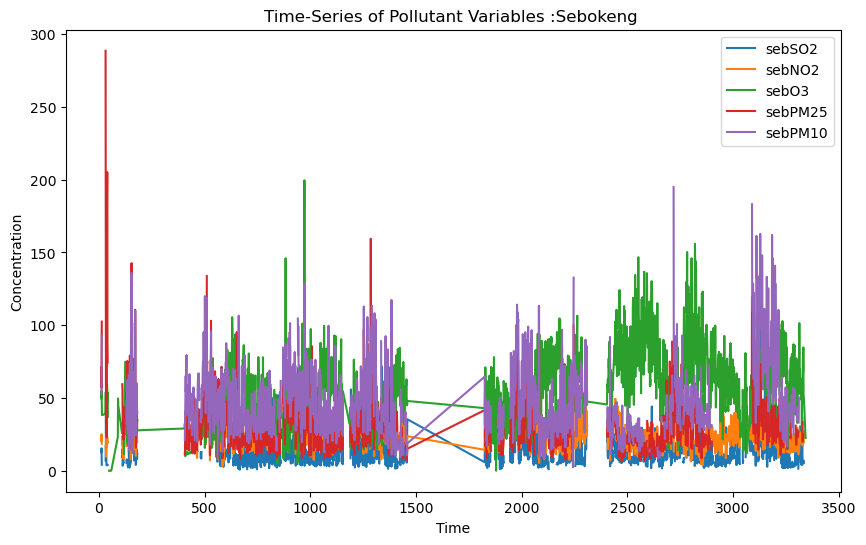

In [139]:
plt.figure(figsize=(10, 6))

plt.plot(data_cleaned.index, data_cleaned['sebSO2'], label='sebSO2')
plt.plot(data_cleaned.index, data_cleaned['sebNO2'], label='sebNO2')
plt.plot(data_cleaned.index, data_cleaned['sebO3'], label='sebO3')
plt.plot(data_cleaned.index, data_cleaned['sebPM25'], label='sebPM25')
plt.plot(data_cleaned.index, data_cleaned['sebPM10'], label='sebPM10')

plt.xlabel('Time')
plt.ylabel('Concentration')
plt.title('Time-Series of Pollutant Variables :Sebokeng ')
plt.legend()
plt.show()

In [140]:
#Multivariate imputation 

In [141]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [142]:
mice_imputer = IterativeImputer(max_iter=10, random_state=0)

In [143]:
data_mice_imputed = mice_imputer.fit_transform(data_cleaned)

In [144]:
data_mice_imputed_df = pd.DataFrame(data_mice_imputed, columns=data_cleaned.columns)

In [145]:
print(data_mice_imputed_df)

          sebSO2      sebNO2       sebO3     sebPM25     sebPM10
0      14.285436   25.855835   53.279000   32.127364   46.425548
1      12.757653   20.591640   49.440750   71.006958   79.615543
2      15.414879   25.047945   55.257417   56.674708   52.925478
3       4.040258   18.503978   46.795583  102.502417   92.675087
4      16.126425   27.829436   38.219000   34.051190   47.985444
5      16.033132   27.729424   38.982167   33.953700   47.906396
6       7.036883   16.658053   42.713750  288.647042  273.435889
7      11.003236   15.049400   54.047000  171.121167  168.402609
8      34.562713    9.707807   25.895000   32.844833   43.960491
9      15.918683   27.192555   40.990870   36.200125   49.900081
10      3.873670   24.340125   39.352917   30.224292   41.969416
11      3.724548   15.723772   30.437833   22.820000   32.454242
12      3.835243   19.651013   39.938250   26.749792   37.640260
13      3.789175   18.448362   59.356500  181.563875  178.022617
14      3.797690   22.827

In [146]:
#visual representation imputed data

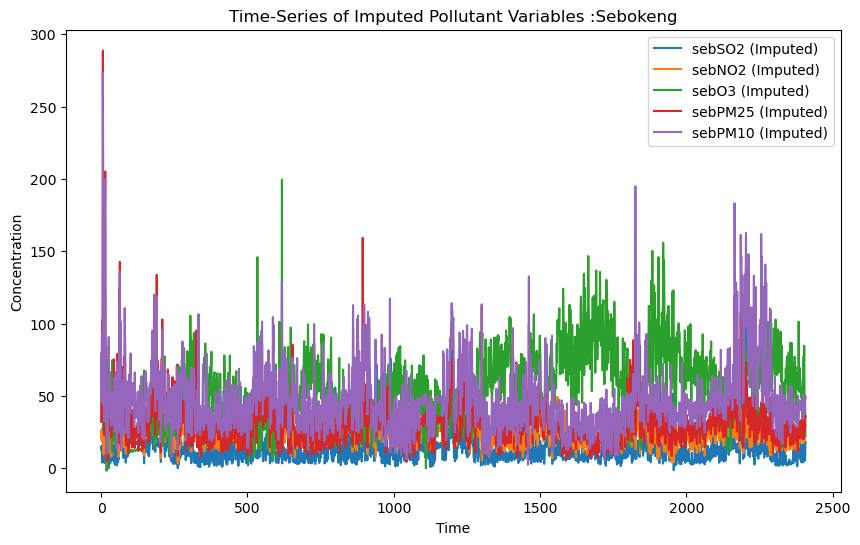

In [147]:
plt.figure(figsize=(10, 6))

plt.plot(data_mice_imputed_df.index, data_mice_imputed_df['sebSO2'], label='sebSO2 (Imputed)')
plt.plot(data_mice_imputed_df.index, data_mice_imputed_df['sebNO2'], label='sebNO2 (Imputed)')
plt.plot(data_mice_imputed_df.index, data_mice_imputed_df['sebO3'], label='sebO3 (Imputed)')
plt.plot(data_mice_imputed_df.index, data_mice_imputed_df['sebPM25'], label='sebPM25 (Imputed)')
plt.plot(data_mice_imputed_df.index, data_mice_imputed_df['sebPM10'], label='sebPM10 (Imputed)')

plt.xlabel('Time')
plt.ylabel('Concentration')
plt.title('Time-Series of Imputed Pollutant Variables :Sebokeng')
plt.legend()
plt.show()

In [148]:
data_mice_imputed_df.describe()

,sebSO2,sebNO2,sebO3,sebPM25,sebPM10
count,2409.000000,2409.000000,2409.000000,2409.000000,2409.000000
mean,13.997828,25.547520,55.631861,31.826846,46.181893
std,10.658141,9.895108,23.941968,17.256416,22.531673
min,-1.639424,0.000000,0.000000,3.634714,2.460333
25%,6.838309,19.173572,37.734417,21.276133,32.062847
50%,11.683453,24.299078,53.783500,29.186167,42.902042
75%,17.304524,29.960855,70.785583,37.111542,52.795652
max,115.727693,115.438737,199.584250,288.647042,273.435889
